(1000, 5, 2)
(1000, 2, 6)
(1000, 1)


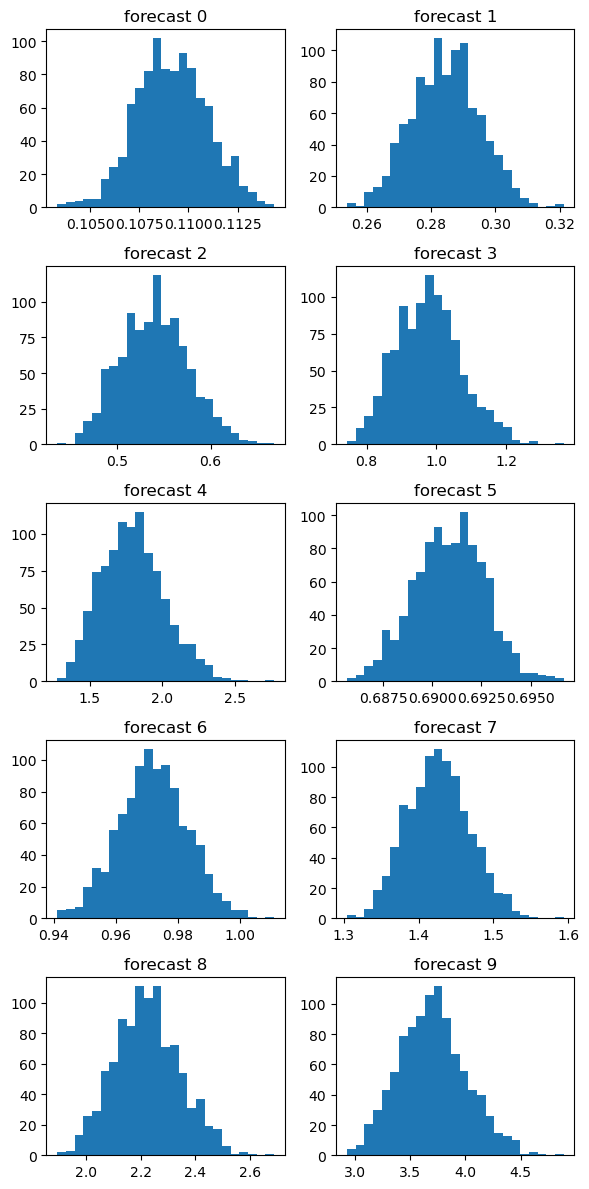

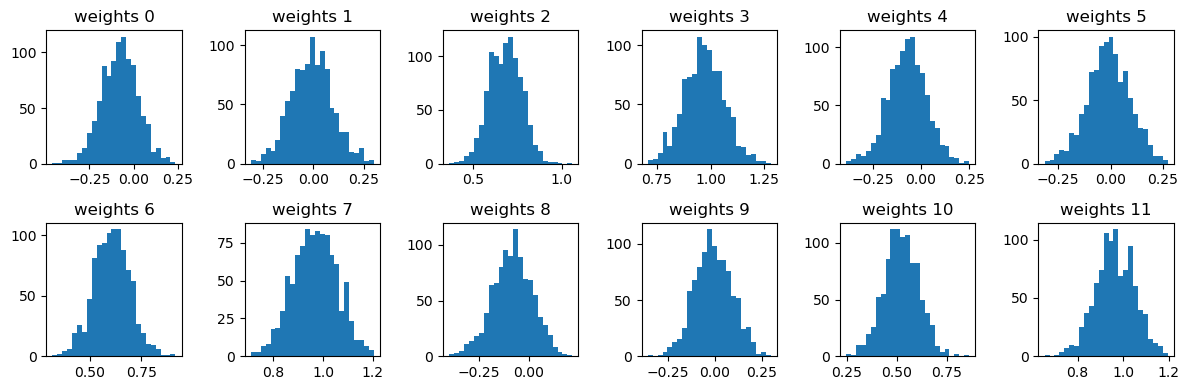

IndexError: list index out of range

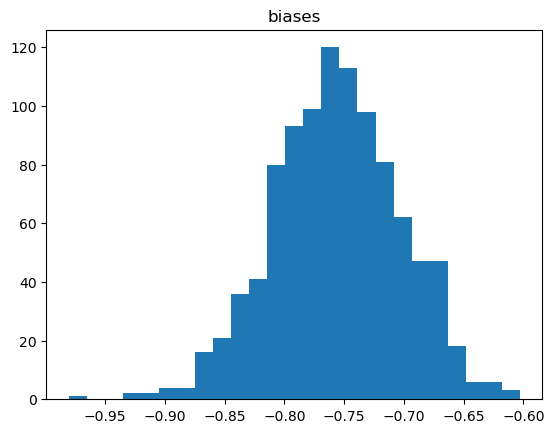

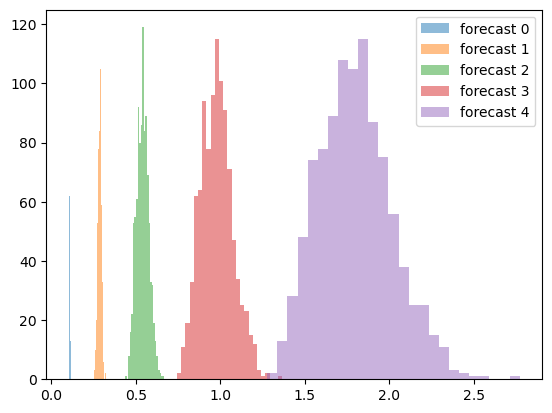

In [45]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

forecast = np.load("data/forecasting.npy")
weights = np.load("data/weights.npy")
biases = np.load('data/biases.npy')

print(forecast.shape)
print(weights.shape)
print(biases.shape)

n_bins = 25

## FORECASTER PLOT
variable = forecast
fig, axs = plt.subplots(5, 2, figsize=(6, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histograms in each subplot
for z in range(variable.shape[2]):
    for y in range(variable.shape[1]):
        f_list = []
        for x in range(variable.shape[0]):
            f_list.append(variable[x][y][z])
        axs[z*variable.shape[1]+y].hist(f_list, bins=n_bins)
        axs[z*variable.shape[1]+y].set_title(f'forecast {z*variable.shape[1]+y}')
f_list = []

plt.tight_layout()
plt.show()

## WEIGHTS PLOT
variable = weights
fig, axs = plt.subplots(variable.shape[1], variable.shape[2], figsize=(12, 4))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histograms in each subplot
for z in range(variable.shape[2]):
    for y in range(variable.shape[1]):
        f_list = []
        for x in range(variable.shape[0]):
            f_list.append(variable[x][y][z])
        axs[z*variable.shape[1]+y].hist(f_list, bins=n_bins)
        axs[z*variable.shape[1]+y].set_title(f'weights {z*variable.shape[1]+y}')
f_list = []

plt.tight_layout()
plt.show()

## BIASES PLOT
variable = biases

# Plot histograms of f_list
for x in range(variable.shape[0]):
    f_list.append(variable[x][0])

plt.hist(f_list, bins=n_bins)
#Put a name
plt.title('biases')


forecasted_values_tot = []
## PLOT OF THE FORECASTED VALUES
for j in range(forecast.shape[1]):
    forecasted = []
    for i in range(forecast.shape[0]):
        forecasted.append(forecast[i][j][0])
    forecasted_values_tot.append(forecasted)

# New figure for a new plot
plt.figure()
# Plot the hist forecasted values in the same graph with different colours
for i in range(5):
    plt.hist(forecasted_values_tot[i], bins=n_bins, alpha=0.5, label=f'forecast {i}')

plt.legend()



